In [ ]:
#run_all_multi.ipynb
# Import required modules
from circuits.quantum_peg_multi import run_qgb, postprocess_qgb
from circuits.biased_distribution_multi import run_qgb_distribution
from circuits.hadamard_walk_qiskit import run_walk_simulation
from metrics.distance_metrics_multi import total_variation_distance, kl_divergence

import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure results directory exists
os.makedirs("results", exist_ok=True)


Gaussian QGB Output Distribution:
Slot 0: 0.0591
Slot 1: 0.4995
Slot 2: 0.2275
Slot 4: 0.1436
Slot 8: 0.0703

Biased QGB Output Distribution:
Slot 0: 0.0034
Slot 1: 0.7607
Slot 2: 0.1719
Slot 4: 0.0513
Slot 8: 0.0127


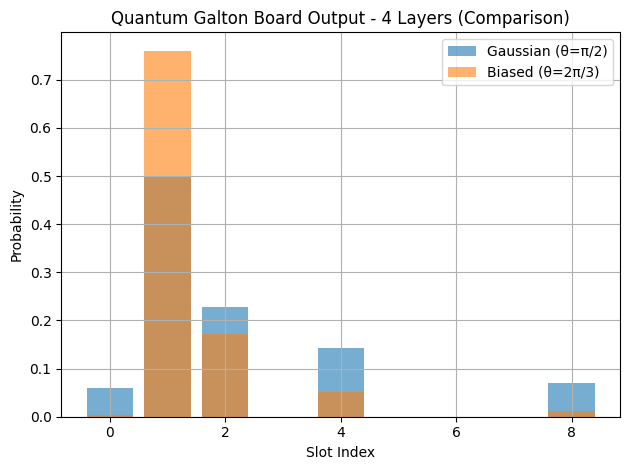

In [2]:
# Parameters
layers = 4
shots = 2048

# Gaussian QGB
_, gauss_counts = run_qgb(layers, theta=np.pi / 2, shots=shots)
gauss_dist = postprocess_qgb(gauss_counts)

# Biased QGB
biased_dist = run_qgb_distribution(layers, theta=2 * np.pi / 3, shots=shots)

print("Gaussian QGB Output Distribution:")
for k in sorted(gauss_dist):
    print(f"Slot {k}: {gauss_dist[k]:.4f}")

print("\nBiased QGB Output Distribution:")
for k in sorted(biased_dist):
    print(f"Slot {k}: {biased_dist[k]:.4f}")

# Plot QGB distributions
plt.bar(gauss_dist.keys(), gauss_dist.values(), alpha=0.6, label='Gaussian (θ=π/2)')
plt.bar(biased_dist.keys(), biased_dist.values(), alpha=0.6, label='Biased (θ=2π/3)')
plt.title(f"Quantum Galton Board Output - {layers} Layers (Comparison)")
plt.xlabel("Slot Index")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("results/qgb_gaussian_vs_biased.png")
plt.show()


In [3]:
tvd = total_variation_distance(gauss_dist, biased_dist)
kld = kl_divergence(gauss_dist, biased_dist)

print(f"Total Variation Distance (TVD): {tvd:.4f}")
print(f"Kullback-Leibler Divergence (KL): {kld:.4f}")


Total Variation Distance (TVD): 0.2612
Kullback-Leibler Divergence (KL): 0.2902


Qiskit Hadamard Walk Output Distribution:
Position -3: 0.1211
Position -1: 0.1230
Position +1: 0.6250
Position +3: 0.1309


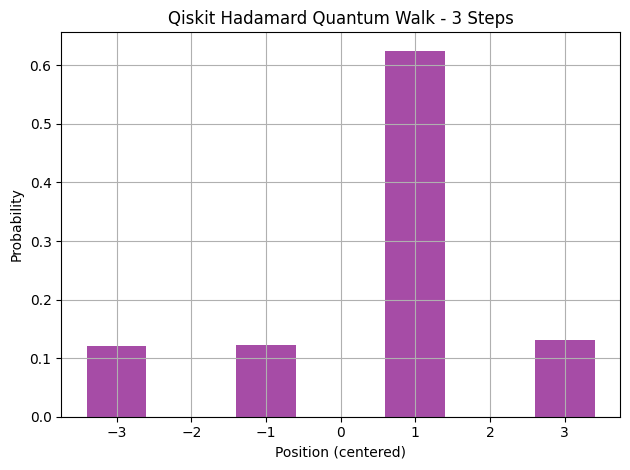

In [4]:
steps = 3
walk_distribution = run_walk_simulation(steps, shots=shots)

print("Qiskit Hadamard Walk Output Distribution:")
for pos in sorted(walk_distribution):
    print(f"Position {pos:+d}: {walk_distribution[pos]:.4f}")

# Plot Hadamard walk
plt.bar(walk_distribution.keys(), walk_distribution.values(), color='purple', alpha=0.7)
plt.title(f"Qiskit Hadamard Quantum Walk - {steps} Steps")
plt.xlabel("Position (centered)")
plt.ylabel("Probability")
plt.grid(True)
plt.tight_layout()
plt.savefig("results/hadamard_walk_qiskit.png")
plt.show()
